In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from asy import *

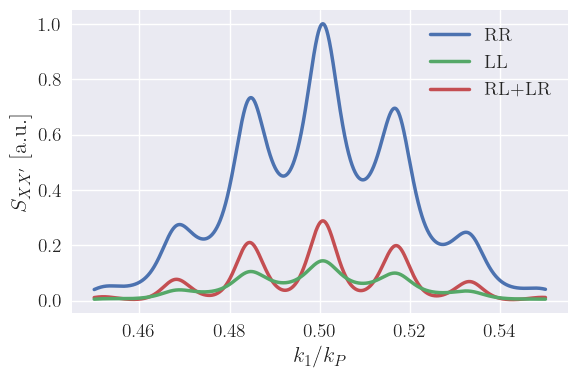

In [2]:
r1 = 0.3
r2 = -0.3
n = [2.18, 2.14, 2.22]
ng = [2.28, 2.18, 2.27]

L_cavity = 10.15

lamb_p = 0.75
kp = 2*np.pi/lamb_p

k1 = np.linspace(0.45, 0.55, 2000) * kp
J = calculate_J(k1, kp, L_cavity, n, ng, r1, r2)

sig = 0.04*kp/2
eta = np.exp(-0.5*(k1-kp/2)**2/sig**2)

C0 = np.abs(J[0])**2*eta
C1 = np.abs(J[1])**2*eta
C2 = np.abs(J[2])**2*eta
C3 = np.abs(J[3])**2*eta

plt.style.use('seaborn-v0_8')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14,
})

fig, ax = plt.subplots(figsize=[6, 4])

ax.plot(k1/kp, C0/C0.max(), lw=2.5, label='RR', zorder=1)
ax.plot(k1/kp, C1/C0.max(), lw=2.5, label='LL', zorder=3)
ax.plot(k1/kp, (C2+C3)/C0.max(), lw=2.5, label='RL+LR', zorder=2)

ax.legend(fontsize=14)

ax.set_xlabel(r'$k_1/k_P$', size=16)
ax.set_ylabel(r"$S_{X X'}$ [a.u.]", size=16)

fig.tight_layout()

In [3]:
n = [2.18, 2.14, 2.22]
ng = [2.28, 2.18, 2.27]

lamb_p = 0.75
kp = 2*np.pi/lamb_p

k1 = np.linspace(0.4, 0.6, 5000) * kp
L_cavity = np.linspace(0, 12, 2000)

R0 = np.zeros((4, L_cavity.size))
R1 = np.zeros((4, L_cavity.size))
R2 = np.zeros((4, L_cavity.size))

sig = 0.04*kp/2
eta = np.exp(-0.5*(k1-kp/2)**2/sig**2)

for i in range(L_cavity.size):
    print(f'{i+1}/{L_cavity.size}', end='\r')
    J = calculate_J(k1, kp, L_cavity[i], n, ng, 0.0, 0.0)
    C0 = np.abs(J[0])**2*eta
    C1 = np.abs(J[1])**2*eta
    C2 = np.abs(J[2])**2*eta
    C3 = np.abs(J[3])**2*eta
    R0[0, i] = simpson(x=k1, y=C0)
    R0[1, i] = simpson(x=k1, y=C1)
    R0[2, i] = simpson(x=k1, y=C2)
    R0[3, i] = simpson(x=k1, y=C3)

    J = calculate_J(k1, kp, L_cavity[i], n, ng, 0.2, -0.2)
    C0 = np.abs(J[0])**2*eta
    C1 = np.abs(J[1])**2*eta
    C2 = np.abs(J[2])**2*eta
    C3 = np.abs(J[3])**2*eta
    R1[0, i] = simpson(x=k1, y=C0)
    R1[1, i] = simpson(x=k1, y=C1)
    R1[2, i] = simpson(x=k1, y=C2)
    R1[3, i] = simpson(x=k1, y=C3)
    
    J = calculate_J(k1, kp, L_cavity[i], n, ng, 0.4, -0.4)
    C0 = np.abs(J[0])**2*eta
    C1 = np.abs(J[1])**2*eta
    C2 = np.abs(J[2])**2*eta
    C3 = np.abs(J[3])**2*eta
    R2[0, i] = simpson(x=k1, y=C0)
    R2[1, i] = simpson(x=k1, y=C1)
    R2[2, i] = simpson(x=k1, y=C2)
    R2[3, i] = simpson(x=k1, y=C3)

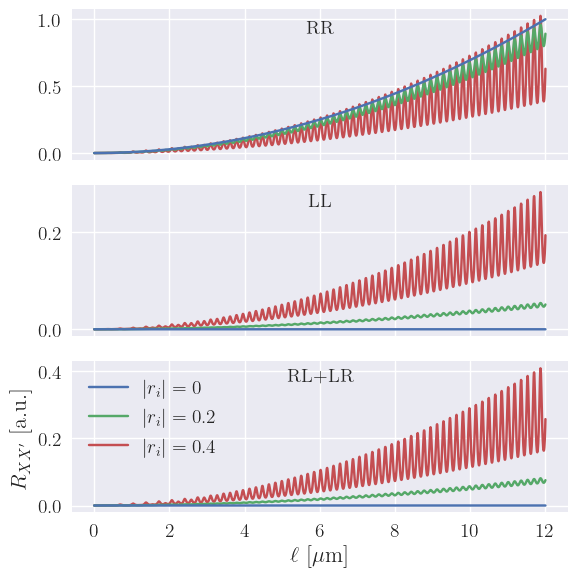

In [4]:
plt.style.use('seaborn-v0_8')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14,
})

fig, ax = plt.subplots(nrows=3, figsize=[6, 6], sharex=True)

ax[0].plot(L_cavity, R0[0]/R0[0].max(), zorder=3)
ax[0].plot(L_cavity, R1[0]/R0[0].max(), zorder=2)
ax[0].plot(L_cavity, R2[0]/R0[0].max(), zorder=1)

ax[1].plot(L_cavity, R0[1]/R0[0].max(), zorder=3)
ax[1].plot(L_cavity, R1[1]/R0[0].max(), zorder=2)
ax[1].plot(L_cavity, R2[1]/R0[0].max(), zorder=1)

ax[2].plot(L_cavity, (R0[2]+R0[3])/R0[0].max(), label=r'$|r_i|=0$', zorder=3)
ax[2].plot(L_cavity, (R1[2]+R1[3])/R0[0].max(), label=r'$|r_i|=0.2$', zorder=2)
ax[2].plot(L_cavity, (R2[2]+R2[3])/R0[0].max(), label=r'$|r_i|=0.4$', zorder=1)

ax[2].legend(fontsize=14)

ax[0].text(6, (R0[0]/R0[0].max()).max(), 'RR', ha='center', va='top')
ax[1].text(6, (R2[1]/R0[0].max()).max(), 'LL', ha='center', va='top')
ax[2].text(6, ((R2[2]+R2[3])/R0[0].max()).max(), 'RL+LR', ha='center', va='top')

ax[2].set_xlabel(r'$\ell$ [$\mu$m]', size=16)
ax[2].set_ylabel(r"$R_{X X'}$ [a.u.]", size=16)

fig.tight_layout()